In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Load data

In [2]:
df = pd.read_csv('generated_results_1102.csv', sep = '\t')
df_rand = df[(df.method=='random sampling') | (df.method=='pca + random sampling') ]
df_most = df[(df.method=='most dominant') | (df.method=='pca + most dominant') ]

In [18]:
df.describe()

,sample,grey,red,green,blue,SRM,EBC,brightness
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,499.819896,99.826915,164.572002,82.622944,16.692740,18.508022,36.446851,56.267549
std,288.648323,60.867064,61.558350,70.977213,30.639448,9.862995,19.302743,31.279358
min,0.000000,11.000000,21.000000,5.000000,3.000000,1.000000,2.000000,7.000000
25%,250.000000,45.000000,110.000000,18.000000,7.000000,10.000000,20.000000,29.000000
50%,500.000000,85.000000,162.000000,61.000000,8.000000,19.000000,37.000000,49.000000
75%,750.000000,146.000000,228.000000,130.000000,9.000000,27.000000,53.000000,78.000000
max,999.000000,248.000000,251.000000,250.000000,248.000000,40.000000,79.000000,158.000000


In [3]:
df[df['sample'] == 897]

,sample,method,masked,grey,red,green,blue,SRM,EBC,brightness
4046,897,random sampling,True,11,22,6,7,40,79,7
4047,897,pca + random sampling,True,11,23,7,7,40,79,8
4048,897,most dominant,True,12,22,5,6,40,79,8
4049,897,pca + most dominant,True,11,21,5,6,40,79,8
4050,897,raw,False,12,22,7,7,40,79,8


# Explore data

To see the difference between pre-processed with PCA and not preprocessed with PCA data is plotted per method

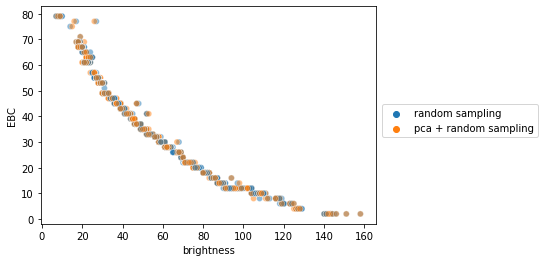

In [4]:
sns.scatterplot(data=df_rand, x='brightness', y='EBC', hue='method', alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('bright_ebc_randsampling.jpeg')

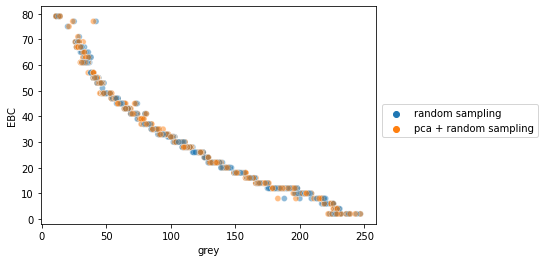

In [5]:
sns.scatterplot(data=df_rand, x='grey', y='EBC', hue='method', alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('grey_ebc_randsampling.jpeg')

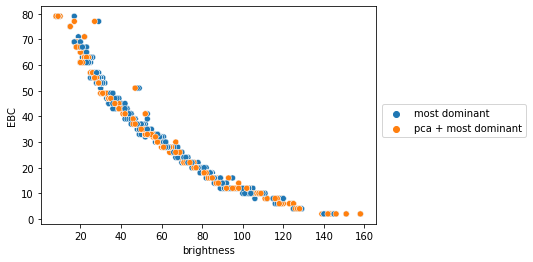

In [6]:
sns.scatterplot(data=df_most, x='brightness', y='EBC', hue='method')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('bright_ebc_most.jpeg')

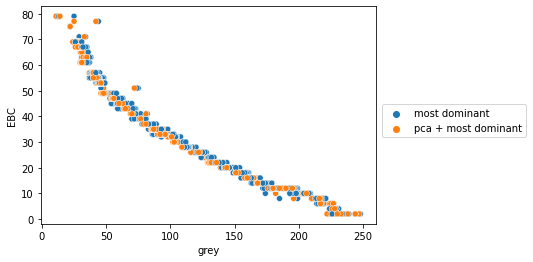

In [7]:
sns.scatterplot(data=df_most, x='grey', y='EBC', hue='method')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('grey_ebc_most.jpeg')

As we can see the PCA method is similar to the other methods. The random sampling seems to have less variation. 

# model without PCA processing

As depicted above brightness and grey value might be used for the regression model

In [8]:
def model_data(df, method):
    df = df[df.method==method] 
    y = df['EBC']
    df['grey_2'] = df['grey']**2
    df['brightness_2'] = df['brightness']**2
    X = np.array(df[['grey', 'brightness', 'grey_2', 'brightness_2']])
    reg = LinearRegression().fit(X, y)
    pred = reg.predict(X)
    df['predicted EBC'] = pred
    formula = f"""{reg.coef_[0]:.2f} * grey value + \
{reg.coef_[2]:.4f} * grey value^2 + \
{reg.coef_[1]:.4f} * brightnes + \
{reg.coef_[3]:.4f} * brightness^2"""
    title = f'EBC for generated pictures ({method}) = \n{formula}'
    return df, title


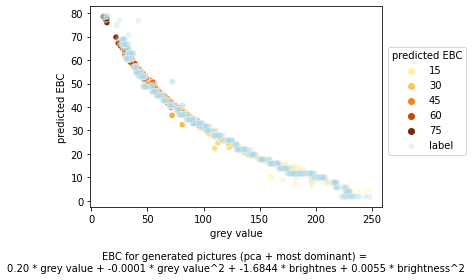

In [9]:
method = 'pca + most dominant'

data = df
dfm, title = model_data(data, method)


sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n
{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')


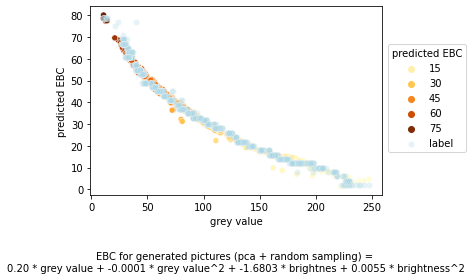

In [10]:
method = 'pca + random sampling'

data = df
dfm, title = model_data(data, method)

sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n

{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')

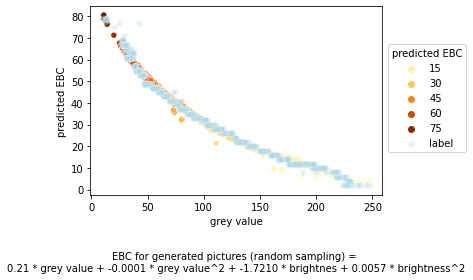

In [11]:
method = 'random sampling'

data = df
dfm, title = model_data(data, method)

sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n

{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')

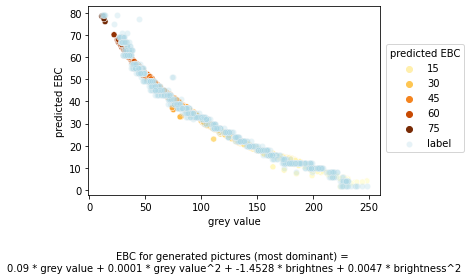

In [12]:
method = 'most dominant'

data = df
dfm, title = model_data(data, method)

sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n

{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')

In [13]:
def evaluate_(df, method):
    df = df[df.method==method] 
    y = df['EBC']
    df['grey_2'] = df['grey']**2
    df['brightness_2'] = df['brightness']**2
    X = np.array(df[['grey', 'brightness', 'grey_2', 'brightness_2']])
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
    print(len(X_train), len(X_test))
    reg = LinearRegression().fit(X_train, y_train)
    y_predicted = reg.predict(X_test)
    # model evaluation for testing set
    mse = metrics.mean_squared_error(y_test, y_predicted)
    r2 = metrics.r2_score(y_test, y_predicted)

    print("The model performance for testing set")
    print("--------------------------------------")
    formula = f"""{reg.coef_[0]:.2f} * grey value + \
{reg.coef_[2]:.4f} * grey value^2 + \
{reg.coef_[1]:.4f} * brightnes + \
{reg.coef_[3]:.4f} * brightness^2"""
    print(f'EBC for generated pictures ({method}) = \n{formula}')
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))


In [14]:
method = 'random sampling'
data = df
evaluate_(data, method)

666 334
The model performance for testing set
--------------------------------------
EBC for generated pictures (random sampling) = 
0.26 * grey value + -0.0002 * grey value^2 + -1.8157 * brightnes + 0.0059 * brightness^2
MSE is 3.3120888665992636
R2 score is 0.9911928909727805


In [15]:
method = 'pca + random sampling'
data = df
evaluate_(data, method)

665 333
The model performance for testing set
--------------------------------------
EBC for generated pictures (pca + random sampling) = 
0.28 * grey value + -0.0002 * grey value^2 + -1.8472 * brightnes + 0.0061 * brightness^2
MSE is 3.190000695298601
R2 score is 0.9911269367848412


In [16]:
method = 'most dominant'
data = df
evaluate_(data, method)

665 333
The model performance for testing set
--------------------------------------
EBC for generated pictures (most dominant) = 
0.27 * grey value + -0.0003 * grey value^2 + -1.8090 * brightnes + 0.0061 * brightness^2
MSE is 4.6197920124018825
R2 score is 0.9874654581931018


In [17]:
method = 'pca + most dominant'
data = df
evaluate_(data, method)

663 332
The model performance for testing set
--------------------------------------
EBC for generated pictures (pca + most dominant) = 
0.13 * grey value + 0.0001 * grey value^2 + -1.5437 * brightnes + 0.0049 * brightness^2
MSE is 2.6668233163500177
R2 score is 0.9928585402262499
